In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
results_folder = '../results'

In [186]:
logistic_res = pd.read_csv(f'{results_folder}/logistic_results_realdata.csv')
logistic_summary = logistic_res.pivot_table(values=['time', 'acc', 'abs_acc', 'logp'], 
                                            index='dset', columns='alg', aggfunc=['mean', 'sem'])

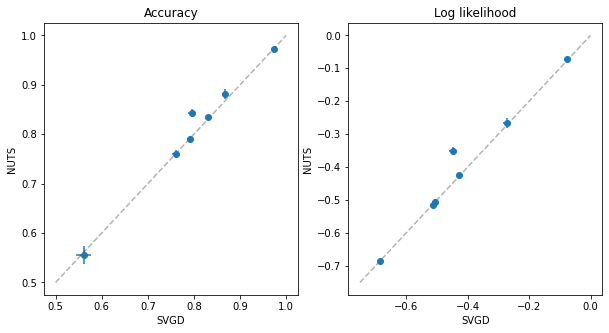

In [187]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(logistic_summary['mean']['abs_acc']['svgd'], logistic_summary['mean']['abs_acc']['nuts'], 
                xerr=logistic_summary['sem']['abs_acc']['svgd'], yerr=logistic_summary['sem']['abs_acc']['nuts'],
                fmt='o')
ax_acc.plot([0.5, 1.], [0.5, 1.], '--k', alpha=0.3)
ax_acc.set_xlabel('SVGD')
ax_acc.set_ylabel('NUTS')
ax_acc.set_title('Accuracy')

ax_logp.errorbar(logistic_summary['mean']['logp']['svgd'], logistic_summary['mean']['logp']['nuts'], 
                 xerr=logistic_summary['sem']['logp']['svgd'], yerr=logistic_summary['sem']['logp']['nuts'],
                 fmt='o')
ax_logp.plot([-0.75, 0.], [-0.75, 0.], '--k', alpha=0.3)
ax_logp.set_xlabel('SVGD')
ax_logp.set_ylabel('NUTS')
ax_logp.set_title('Log likelihood')

fig.savefig('./logistic_svgd_nuts')

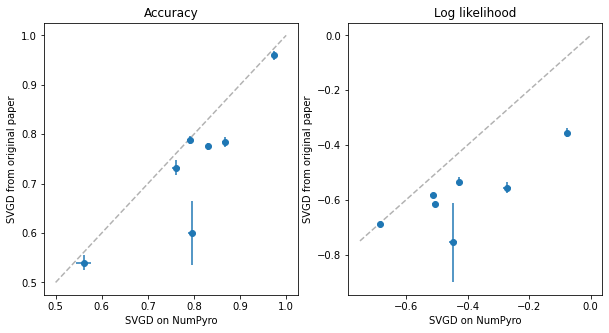

In [188]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(logistic_summary['mean']['abs_acc']['svgd'], logistic_summary['mean']['abs_acc']['svgd_orig'], 
                xerr=logistic_summary['sem']['abs_acc']['svgd'], yerr=logistic_summary['sem']['abs_acc']['svgd_orig'],
                fmt='o')
ax_acc.plot([0.5, 1.], [0.5, 1.], '--k', alpha=0.3)
ax_acc.set_xlabel('SVGD on NumPyro')
ax_acc.set_ylabel('SVGD from original paper')
ax_acc.set_title('Accuracy')

ax_logp.errorbar(logistic_summary['mean']['logp']['svgd'], logistic_summary['mean']['logp']['svgd_orig'], 
                 xerr=logistic_summary['sem']['logp']['svgd'], yerr=logistic_summary['sem']['logp']['svgd_orig'],
                 fmt='o')
ax_logp.plot([-0.75, 0.], [-0.75, 0.], '--k', alpha=0.3)
ax_logp.set_xlabel('SVGD on NumPyro')
ax_logp.set_ylabel('SVGD from original paper')
ax_logp.set_title('Log likelihood')

fig.savefig('./logistic_svgd_variants')

In [189]:
columns = [
    ('acc',       'nuts'),
    ('acc',       'svgd'),
    ('acc',  'svgd_orig'),
    ('logp',      'nuts'),
    ('logp',      'svgd'),
    ('logp', 'svgd_orig'),
]

f = lambda x: f'{x:.3f}'
result_table_logist = logistic_summary['mean'].applymap(f) + " \pm " + logistic_summary['sem'].applymap(f)
result_table_logist = result_table_logist[columns]
result_table_logist

acc                                                logp  \
alg                  nuts             svgd        svgd_orig              nuts   
dset                                                                            
banana    0.508 \pm 0.002  0.509 \pm 0.002  0.503 \pm 0.001  -0.686 \pm 0.004   
image     0.731 \pm 0.001  0.732 \pm 0.002  0.609 \pm 0.012  -0.425 \pm 0.005   
ringnorm  0.665 \pm 0.003  0.665 \pm 0.003  0.575 \pm 0.005  -0.514 \pm 0.008   
splice    0.777 \pm 0.004  0.736 \pm 0.005  0.612 \pm 0.033  -0.351 \pm 0.011   
titanic   0.666 \pm 0.003  0.671 \pm 0.003  0.549 \pm 0.003  -0.505 \pm 0.009   
twonorm   0.962 \pm 0.001  0.965 \pm 0.001  0.711 \pm 0.012  -0.070 \pm 0.003   
waveform  0.830 \pm 0.005  0.822 \pm 0.005  0.586 \pm 0.015  -0.265 \pm 0.015   

                                              
alg                   svgd         svgd_orig  
dset                                          
banana    -0.686 \pm 0.004  -0.689 \pm 0.001  
image     -0.429 \pm 0.006  -0.533 \pm 0.015  
ringnorm  -0.513 \pm 0.008  -0.583 \pm 0.008  
splice    -0.448 \pm 0.013  -0.756 \pm 0.146  
titanic   -0.504 \pm 0.010  -0.616 \pm 0.006  
twonorm   -0.077 \pm 0.003  -0.355 \pm 0.017  
waveform  -0.272 \pm 0.013  -0.557 \pm 0.020

In [190]:
print(result_table_logist.style.to_latex())

\begin{tabular}{lllllll}
 & \multicolumn{3}{r}{acc} & \multicolumn{3}{r}{logp} \\
alg & nuts & svgd & svgd_orig & nuts & svgd & svgd_orig \\
dset &  &  &  &  &  &  \\
banana & 0.508 \pm 0.002 & 0.509 \pm 0.002 & 0.503 \pm 0.001 & -0.686 \pm 0.004 & -0.686 \pm 0.004 & -0.689 \pm 0.001 \\
image & 0.731 \pm 0.001 & 0.732 \pm 0.002 & 0.609 \pm 0.012 & -0.425 \pm 0.005 & -0.429 \pm 0.006 & -0.533 \pm 0.015 \\
ringnorm & 0.665 \pm 0.003 & 0.665 \pm 0.003 & 0.575 \pm 0.005 & -0.514 \pm 0.008 & -0.513 \pm 0.008 & -0.583 \pm 0.008 \\
splice & 0.777 \pm 0.004 & 0.736 \pm 0.005 & 0.612 \pm 0.033 & -0.351 \pm 0.011 & -0.448 \pm 0.013 & -0.756 \pm 0.146 \\
titanic & 0.666 \pm 0.003 & 0.671 \pm 0.003 & 0.549 \pm 0.003 & -0.505 \pm 0.009 & -0.504 \pm 0.010 & -0.616 \pm 0.006 \\
twonorm & 0.962 \pm 0.001 & 0.965 \pm 0.001 & 0.711 \pm 0.012 & -0.070 \pm 0.003 & -0.077 \pm 0.003 & -0.355 \pm 0.017 \\
waveform & 0.830 \pm 0.005 & 0.822 \pm 0.005 & 0.586 \pm 0.015 & -0.265 \pm 0.015 & -0.272 \pm 0.013 & -

In [117]:
bnn_res = pd.read_csv(f'{results_folder}/bnn_results_uci.csv')
bnn_summary = bnn_res.pivot_table(values=['time', 'rmse', 'logp'], index='dset', columns='alg', aggfunc=['mean', 'sem'])

Text(0.5, 1.0, 'Log likelihood')

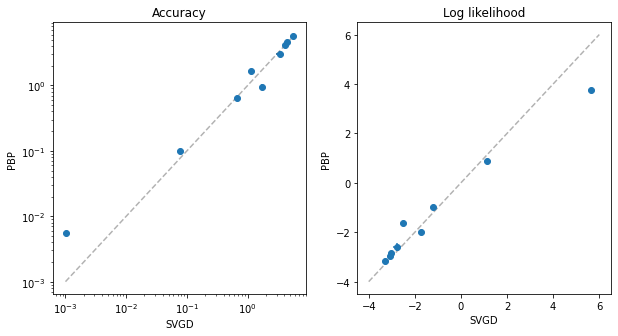

In [121]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(bnn_summary['mean']['rmse']['svgd'], bnn_summary['mean']['rmse']['pbp'], 
                xerr=bnn_summary['sem']['rmse']['svgd'], yerr=bnn_summary['sem']['rmse']['pbp'],
                fmt='o')
ax_acc.plot([1e-3, 6.], [1e-3, 6.], '--k', alpha=0.3)
ax_acc.set_xlabel('SVGD')
ax_acc.set_ylabel('PBP')
ax_acc.set_title('Accuracy')
ax_acc.set_xscale('log')
ax_acc.set_yscale('log')

ax_logp.errorbar(bnn_summary['mean']['logp']['svgd'], bnn_summary['mean']['logp']['pbp'], 
                xerr=bnn_summary['sem']['logp']['svgd'], yerr=bnn_summary['sem']['logp']['pbp'],
                fmt='o')
ax_logp.plot([-4., 6.], [-4., 6.], '--k', alpha=0.3)
ax_logp.set_xlabel('SVGD')
ax_logp.set_ylabel('PBP')
ax_logp.set_title('Log likelihood')

Text(0.5, 1.0, 'Log likelihood')

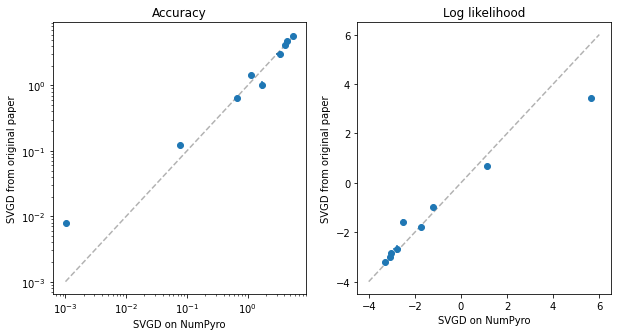

In [122]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(bnn_summary['mean']['rmse']['svgd'], bnn_summary['mean']['rmse']['svgd_orig'], 
                xerr=bnn_summary['sem']['rmse']['svgd'], yerr=bnn_summary['sem']['rmse']['svgd_orig'],
                fmt='o')
ax_acc.plot([1e-3, 6.], [1e-3, 6.], '--k', alpha=0.3)
ax_acc.set_xlabel('SVGD on NumPyro')
ax_acc.set_ylabel('SVGD from original paper')
ax_acc.set_title('Accuracy')
# ax_acc.get_legend().remove()
ax_acc.set_xscale('log')
ax_acc.set_yscale('log')

ax_logp.errorbar(bnn_summary['mean']['logp']['svgd'], bnn_summary['mean']['logp']['svgd_orig'], 
                xerr=bnn_summary['sem']['logp']['svgd'], yerr=bnn_summary['sem']['logp']['svgd_orig'],
                fmt='o')
ax_logp.plot([-4., 6.], [-4., 6.], '--k', alpha=0.3)
ax_logp.set_xlabel('SVGD on NumPyro')
ax_logp.set_ylabel('SVGD from original paper')
ax_logp.set_title('Log likelihood')

In [123]:
columns = [
    ('rmse',       'pbp'),
    ('rmse',      'svgd'),
    ('rmse', 'svgd_orig'),
    ('logp',       'pbp'),
    ('logp',      'svgd'),
    ('logp', 'svgd_orig'),
]

f = lambda x: f'{x:.3f}'
result_table = bnn_summary['mean'].applymap(f) + " \pm " + bnn_summary['sem'].applymap(f)
result_table = result_table[columns]
result_table

rmse                                                logp  \
alg                   pbp             svgd        svgd_orig               pbp   
dset                                                                            
boston    3.039 \pm 0.303  3.430 \pm 0.449  2.999 \pm 0.343  -2.610 \pm 0.159   
concrete  5.699 \pm 0.075  5.661 \pm 0.145  5.763 \pm 0.090  -3.164 \pm 0.016   
energy    1.676 \pm 0.050  1.143 \pm 0.064  1.421 \pm 0.049  -1.989 \pm 0.018   
kin8nm    0.099 \pm 0.001  0.077 \pm 0.001  0.121 \pm 0.001   0.892 \pm 0.010   
naval     0.006 \pm 0.000  0.001 \pm 0.000  0.008 \pm 0.000   3.740 \pm 0.011   
power     4.143 \pm 0.050  4.156 \pm 0.051  4.206 \pm 0.049  -2.841 \pm 0.012   
protein   4.680 \pm 0.009  4.518 \pm 0.009  4.859 \pm 0.013  -2.962 \pm 0.002   
wine      0.640 \pm 0.015  0.666 \pm 0.013  0.634 \pm 0.014  -0.979 \pm 0.027   
yacht     0.948 \pm 0.087  1.719 \pm 0.101  1.017 \pm 0.141  -1.622 \pm 0.026   

                                              
alg                   svgd         svgd_orig  
dset                                          
boston    -2.776 \pm 0.191  -2.683 \pm 0.157  
concrete  -3.293 \pm 0.049  -3.187 \pm 0.020  
energy    -1.732 \pm 0.021  -1.781 \pm 0.039  
kin8nm     1.125 \pm 0.014   0.690 \pm 0.010  
naval      5.658 \pm 0.039   3.429 \pm 0.010  
power     -3.036 \pm 0.032  -2.859 \pm 0.013  
protein   -3.055 \pm 0.007  -3.002 \pm 0.003  
wine      -1.214 \pm 0.043  -0.971 \pm 0.021  
yacht     -2.509 \pm 0.005  -1.573 \pm 0.102

In [124]:
print(result_table.style.to_latex())

\begin{tabular}{lllllll}
 & \multicolumn{3}{r}{rmse} & \multicolumn{3}{r}{logp} \\
alg & pbp & svgd & svgd_orig & pbp & svgd & svgd_orig \\
dset &  &  &  &  &  &  \\
boston & 3.039 \pm 0.303 & 3.430 \pm 0.449 & 2.999 \pm 0.343 & -2.610 \pm 0.159 & -2.776 \pm 0.191 & -2.683 \pm 0.157 \\
concrete & 5.699 \pm 0.075 & 5.661 \pm 0.145 & 5.763 \pm 0.090 & -3.164 \pm 0.016 & -3.293 \pm 0.049 & -3.187 \pm 0.020 \\
energy & 1.676 \pm 0.050 & 1.143 \pm 0.064 & 1.421 \pm 0.049 & -1.989 \pm 0.018 & -1.732 \pm 0.021 & -1.781 \pm 0.039 \\
kin8nm & 0.099 \pm 0.001 & 0.077 \pm 0.001 & 0.121 \pm 0.001 & 0.892 \pm 0.010 & 1.125 \pm 0.014 & 0.690 \pm 0.010 \\
naval & 0.006 \pm 0.000 & 0.001 \pm 0.000 & 0.008 \pm 0.000 & 3.740 \pm 0.011 & 5.658 \pm 0.039 & 3.429 \pm 0.010 \\
power & 4.143 \pm 0.050 & 4.156 \pm 0.051 & 4.206 \pm 0.049 & -2.841 \pm 0.012 & -3.036 \pm 0.032 & -2.859 \pm 0.013 \\
protein & 4.680 \pm 0.009 & 4.518 \pm 0.009 & 4.859 \pm 0.013 & -2.962 \pm 0.002 & -3.055 \pm 0.007 & -3.002 \pm 0

In [182]:
bb_epochs = pd.read_csv(f'{results_folder}/bnn_results_epochs.csv')
bb_epochs_results = bb_epochs.pivot_table(values=['RMSE', 'Log likelihood'], 
                                          index=['Epoch'], columns=['Dataset', 'Algorithm'])

In [183]:
dsets_in_epoch = {x[1] for x in bb_epochs_results.columns}
dsets_in_epoch = sorted(dsets_in_epoch)

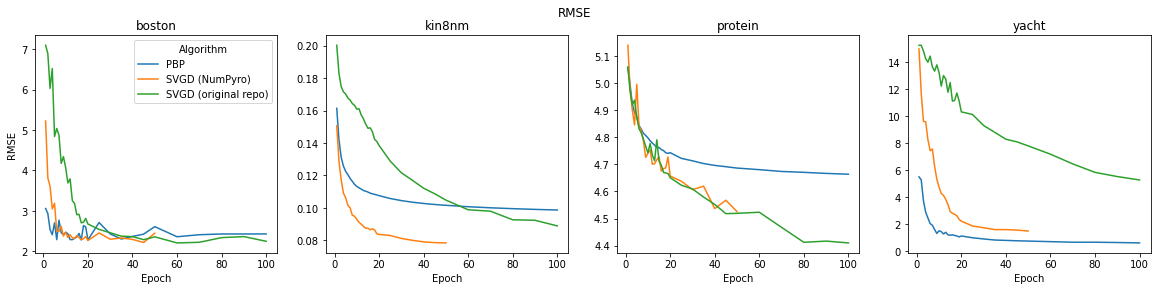

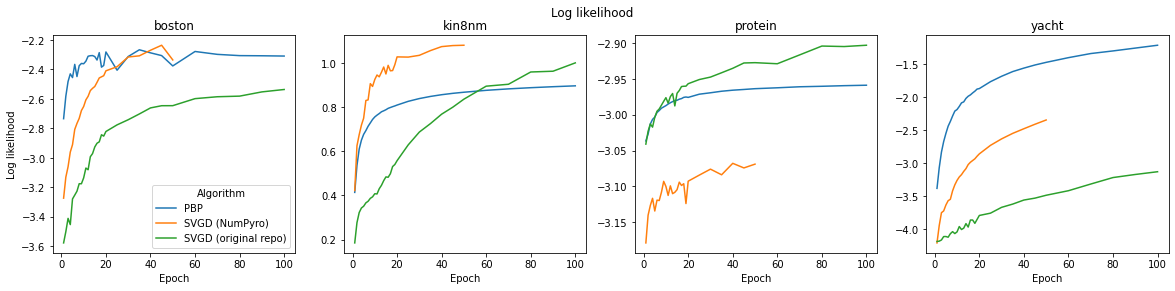

In [192]:
for val in ['RMSE', "Log likelihood"]:
    fig, axs = plt.subplots(ncols=len(dsets_in_epoch), figsize=(20, 4))
    for i, (dset, ax) in enumerate(zip(dsets_in_epoch, axs)):
        bb_epochs_results[val, dset].plot(ax=ax)
        ax.set_title(dset)
        fig.suptitle(val)
        if i:
            ax.get_legend().remove()
        else:
            ax.set_ylabel(val)
    fig.savefig(f'./bayesian_epoch_{val.replace(" ", "")}')